In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
N = 10000
x = np.linspace(0, 10, N)
data = 1/np.tan(42*x) + 0.1*np.random.randn(N)#функція ctg(42x)

<ipython-input-7-5ff643474471>:3: RuntimeWarning: divide by zero encountered in divide
  data = 1/np.tan(42*x) + 0.1*np.random.randn(N)#функція ctg(42x)


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True), input_shape=(None, 1)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(1)
])
model.compile(loss='mse', optimizer='adam')

In [10]:
x_train = data[:-1]
y_train = data[1:]
x_train = np.expand_dims(x_train, axis=-1)

In [14]:
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2)
predictions = model.predict(x_train)

Epoch 1/30
125/125 [==============================] - 1s 11ms/step - loss: nan - val_loss: nan
Epoch 2/30
125/125 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 3/30
125/125 [==============================] - 1s 8ms/step - loss: nan - val_loss: nan
Epoch 4/30
125/125 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 5/30
125/125 [==============================] - 1s 8ms/step - loss: nan - val_loss: nan
Epoch 6/30
125/125 [==============================] - 1s 8ms/step - loss: nan - val_loss: nan
Epoch 7/30
125/125 [==============================] - 1s 8ms/step - loss: nan - val_loss: nan
Epoch 8/30
125/125 [==============================] - 2s 15ms/step - loss: nan - val_loss: nan
Epoch 9/30
125/125 [==============================] - 1s 11ms/step - loss: nan - val_loss: nan
Epoch 10/30
125/125 [==============================] - 1s 9ms/step - loss: nan - val_loss: nan
Epoch 11/30
125/125 [==============================] - 1

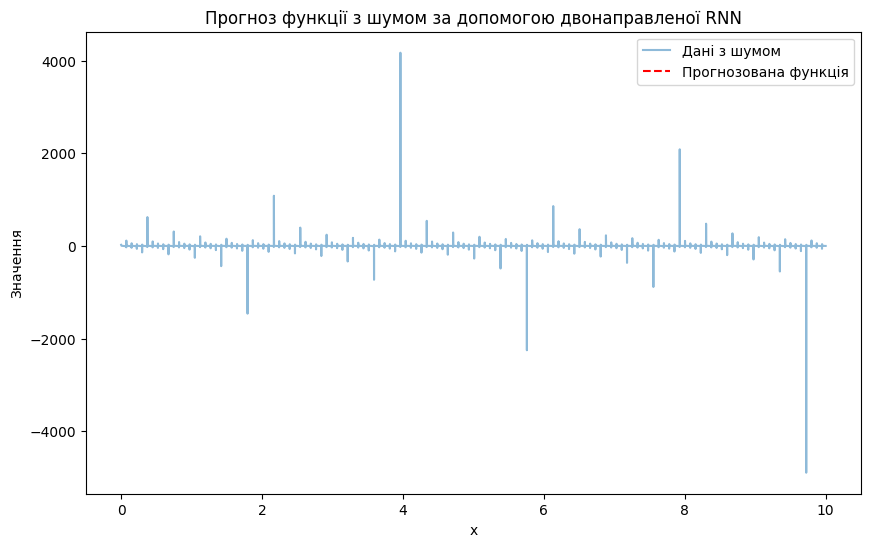

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(x, data, label='Дані з шумом', alpha=0.5)
plt.plot(x[1:], predictions, label='Прогнозована функція', color='red', linestyle='--')
plt.title('Прогноз функції з шумом за допомогою двонаправленої RNN')
plt.xlabel('x')
plt.ylabel('Значення')
plt.legend()
plt.show()